#**Covid-19 Visualization, Prediction and Forecasting** 
By Ubong Camilus Ben

## Introduction 


*   COVID-19 is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. 

* COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

* Currently the goal of all scientists around the world is to "Flatten the Curve". In late 2019 and early 2020, COVID-19 had an exponential growth rate around the world. While the steepness of this curve had long reduced, the goal of all scientist around the world is to totally flatten the curve. Flattening the Curve typically implies distributio cases should have a longer timestamp. In simpler words, this means that if say suppose COVID-19 is going infect people, it should take a very long time for that to happen e.g 1000 people in 4 years. 

* The sole reason to Flatten the Curve is to reduce the load on the Medical Systems and provide window for researchers to find ameliorations for the  disease.


The Covid-19 Pandemic for every country has four stages:

Stage 1: Confirmed cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission.

Stage 4: Significant Transmission.



Other ways to tackle the disease like Corona other than Travel Ban, Cross-Border shutdown, Ban on immigrants are Testing, Contact Tracing and Quarantine.

COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month. 

The sole reason for flattening  the Curve is to reduce the load on the Medical Systems so as to increase the focus of Research to find the Medicine for the disease.

Every Pandemic has four stages:

Stage 1: Confirmed Cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission

Stage 4: Significant (global) Transmission 

Most countries around the world reached the fourth stage. To this end, several measures were developed to tackle the disease. Some of the measures were Cross-Border shutdown, travel bans, immigrant testing, contact tracing and quarantine. 


## Statement of Problem

The frenzy around the Covid-19 virus may have massively regressed. However, the pandemic is far from being over. Infact, in some asian communities, movement restrictions are still in place. This means that the fight against the disease is still ongoing. 
However, to fight this battle, it is important to understand the behavioral sentiments of the disease. Also, it would be necessary to forecast the future state of the spread. This last point would help in planning and development of preventive measures.

# Objective of the Project

* To study COVID-19 outbreak with the help of some basic visualizations techniques. 
* Comparison of China where the COVID-19 originally originated from with the Rest of the World. 
* Perform predictions and Time Series forecasting in order to study the impact and spread of the disease. 

# Table of contents

1.   Import packages 
2.   The dataset
3.   Exploratory Data Analysis (EDA)




## Importing required Python Packages and Libraries

In [ ]:
#Avoid ugly warnings
import warnings
warnings.filterwarnings('ignore')

#visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#numpy and datetime
import numpy as np
import datetime as dt
from datetime import timedelta

#statistic models
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller

#sklearn: machine learning libraries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

#miscilleanous
#from fbprophet import Prophet
#from pyramid.arima import auto_arima
std=StandardScaler()


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '17Da_2r7HUm44VqYvlyELyE2KIJbtm9xp' 

download = drive.CreateFile({'id': file_id})


# Download the file to a local disc
download.GetContentFile('covid_19_data.csv')

Let us import the data and have a peek at it.

In [ ]:
covid=pd.read_csv('covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000


Now that our data is in. Lets gets some information about the data. First, we should know the shape, then the datatype of each column. Lets go...

In [ ]:
# number of rows and columns in dataset
covid.shape


(98252, 8)

In [ ]:
#datatype of each feature
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

It seems that the SNo column is redundant. We may need to drop it from our dataset

In [ ]:
covid.drop(["SNo"],1,inplace=True)

Again, the "ObservationDate" feature is an object. That is not good

Let us change it into Datetime format

In [ ]:

covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

Let have a broad look at the dataset based on countries and cases. We will use the groupby function to achieve this

In [ ]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

A good way to check the severity of a pandemic is to know how fast it is spreading and the intensity of mortality. We will now group cases bases on duration. It is expected that the larger the number of cases or mortality rate, the worse the situation.

In [ ]:
#group the data based on confirmed infections, recovered and deaths.

datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

**Time-based behavior of covid-19 cases**

In [ ]:
print(" Total number of countries with Disease Spread: ",len(covid["Country/Region"].unique()),
     "\n Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1],
     "\n Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1],
    "\n Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1],
    "\n Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]),
    "\n Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1],
    "\n Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]),
    "\n Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]),
    "\n Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]),
    "\n Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)),
    "\n Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)),
    "\n Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)),
    "\n Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2],
    "\n Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2],
    "\n Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

 Total number of countries with Disease Spread:  223 
 Total number of Confirmed Cases around the World:  24996456.0 
 Total number of Recovered Cases around the World:  16409757.0 
 Total number of Deaths Cases around the World:  842499.0 
 Total number of Active Cases around the World:  7744200.0 
 Total number of Closed Cases around the World:  17252256.0 
 Approximate number of Confirmed Cases per Day around the World:  113106.0 
 Approximate number of Recovered Cases per Day around the World:  74252.0 
 Approximate number of Death Cases per Day around the World:  3812.0 
 Approximate number of Confirmed Cases per hour around the World:  4713.0 
 Approximate number of Recovered Cases per hour around the World:  3094.0 
 Approximate number of Death Cases per hour around the World:  159.0 
 Number of Confirmed Cases in last 24 hours:  262008.0 
 Number of Recovered Cases in last 24 hours:  211592.0 
 Number of Death Cases in last 24 hours:  5375.0


Okay, It looks like the situation is not very good. Some very depressing numbers. More than 4500 deaths per hour is really really bad. But of course, we do not need to get too emotional.

Lets get some visual feel of the situation. Hopefully, its not as bad as the numbers say...



First, let us visualize the number of active cases.

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

So what do we mean by active cases?
These are the number of confirmed covid 19 cases minus the deaths and recoveries.  
It can be an indication that the recoveries or deaths are dropping. Interpreting this is subjective and practically relative. 

Okay now let us look at closed cases...These are basically the opposite of opposite cases. It indicates full recoveries and deaths. Less mortality and large closed cases is actually a good thing.
So what do we see?

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

Lets consider the behavior of the infections and mortality from a micro angle. Say weekly....

In [ ]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

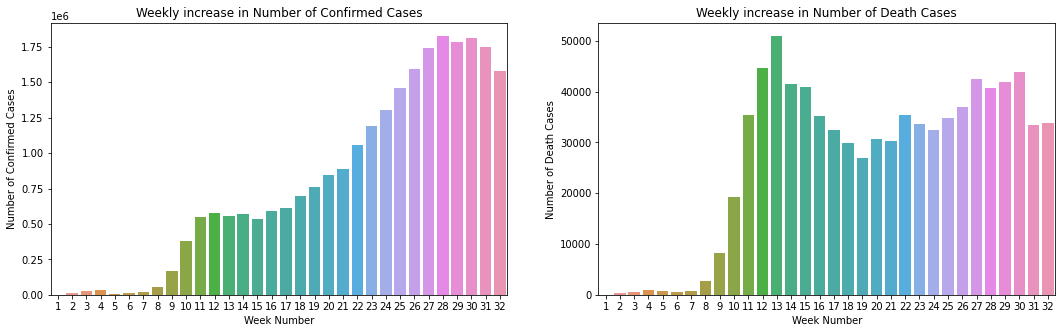

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(18,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

##### **So what have we seen here?**
---



The number of death cases rose steadily from the beginning of the year till the 14th week where it dropped significantly and even consistently so until the 19th week. Here the world had started to understand the disease. Then another variant came up and the infections started to kick up again. Of course, the death rate rose too and continued spiking for two more weeks. 

In any case, the global health community were able to control the spike in mortality but this did not affect infections. Infections kept growing even up to  800000 cases in the 21st week; 1.2 million by the 24th week and a staggering 1.5 million covid-19 cases in the 25th week!!!!!

During this period of analysis, things are not going so well.

`Okay, Now thats some busy weeks. How about the performance of the infections daily. Daily analysis will give us more grainy details of the situation`

In [ ]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()),
     "\n Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()),
    "\n Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day:  113104.0 
 Average increase in number of Recovered Cases every day:  74252.0 
 Average increase in number of Deaths Cases every day:  3812.0


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

We have conducted time based analysis of the data supplied. However, these figures be subjective. We need to get some more decisive and defendable numbers. 
We will now calculate the Mortality rate and recovery rate.

Mathematically, 

`Mortality rate = Number of Death Cases / Number of Confirmed Cases`

`Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100`

In [ ]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 4.634104124836859
Median Mortality Rate 4.4083056727246195
Average Recovery Rate 39.16083883932324
Median Recovery Rate 42.09012917192399


Mortality rate is generally decreasing wih time - which is a positive situation.

Over time, Recovery Rate has started to pick up again which is a good sign. This is understandable as the world is getting to to understand how to manage the infection. This is also believed to be one of the reasons why the closed cases are increasing. 

Great situation....

**Doubling rate**

Doubling rate is the rate at which the number of cases doubles in number. It is a measure of exponentiality. We do not want a large doubling rate if the pandemic is be reduced. 

In [ ]:
c=560
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days Since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

In [ ]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
doubling_rate

,No. of cases,Days since first Case,Number of days for doubling
0,560,0 days,0 days
1,1120,2 days,2 days
2,2240,4 days,2 days
3,4480,5 days,1 days
4,8960,8 days,3 days
5,17920,11 days,3 days
6,35840,16 days,5 days
7,71680,25 days,9 days
8,143360,50 days,25 days
9,286720,58 days,8 days


The doubling rate is rapidly fluctuating. This is not supposed to be the case if we are flattening the curve.

 **Growth Factor**
 
Growth factor (GF) is the factor by which a quantity multiplies itself over time. The formula used is:

`**GF=Present(Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day**`



In [ ]:
print(" Average growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).mean(),
"\n Median growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).median(),
"\n Average growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).mean(),
"\n Median growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).median(),
"\n Average growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).mean(),
"\n Median growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).median())

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

 Average growth factor of number of Confirmed Cases:  1.0534037322997345 
 Median growth factor of number of Confirmed Cases:  1.0202013845748947 
 Average growth factor of number of Recovered Cases:  1.0659417596633376 
 Median growth factor of number of Recovered Cases:  1.0305531800502579 
 Average growth factor of number of Death Cases:  1.0534793524039714 
 Median growth factor of number of Death Cases:  1.0153996847560398


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])/(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["Recovered"]+datewise["Deaths"])/(datewise["Recovered"]+datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

****Interpretation****

A growth factor **>1 -->>  an increase correspoding cases**.

A growth factor **> 1 but trending downward -->> positive sign**

growth factor **constantly > 1 -->> exponential growth**.

A growth factor **constant at 1 -->> no change in cases**.

A growth factor **< 1 -->> more patients are getting recovered or dying as compared to the Confirmed Cases**.

That done and said...Maybe said and done 😃, we have obtained a global picture of how the pandemic situation looks like based on our dataset. Not bad... I mean ...preety bad!!!

However, lets not get ahead of ourselfs. The whole world cant just be dying at the same time. The world is made up of several countries and thousands of villages. The picture cant be the same everywhere. 

So lets do some country based analysis. Who knows!! we may be safe where we are...

In [ ]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [ ]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Deaths"])

In [ ]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])

Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

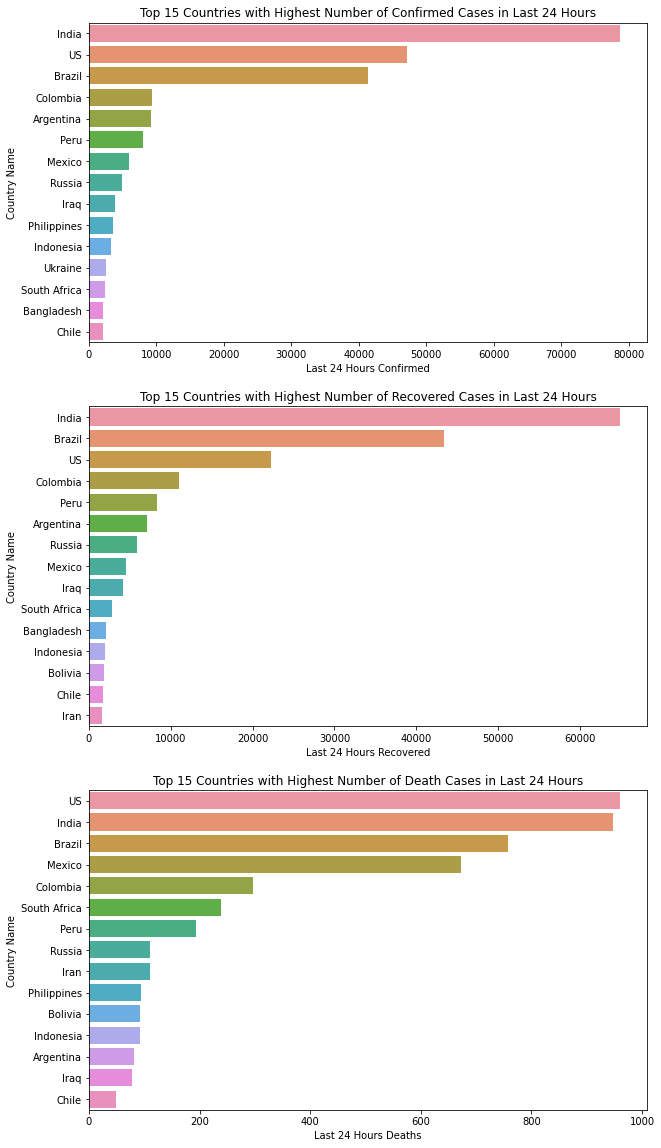

In [ ]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
sns.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

In [ ]:
Last_24_Hours_country["Proportion of Confirmed"]=(Last_24_Hours_country["Last 24 Hours Confirmed"]/(datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Recovered"]=(Last_24_Hours_country["Last 24 Hours Recovered"]/(datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Deaths"]=(Last_24_Hours_country["Last 24 Hours Deaths"]/(datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2]))*100

It seems that the situation in North american and south american countries needs some urgent amelioration. 

But that is just an overview. What does the real numbers say? 

Morover, the data above was for 24 hours, lets get a more general and detailed picture...

### Proportion of Countries in Confirmed, Recovered and Death Cases 

In [ ]:
Last_24_Hours_country[["Country Name","Proportion of Confirmed","Proportion of Recovered","Proportion of Deaths"]].sort_values(["Proportion of Confirmed"],ascending=False).style.background_gradient(cmap="Reds")

,Country Name,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths
2,India,30.060533,30.688778,17.637209
0,US,17.996779,10.514103,17.879070
1,Brazil,15.781961,20.512118,14.102326
6,Colombia,3.584623,5.176944,5.525581
10,Argentina,3.522793,3.334247,1.525581
4,Peru,3.039602,3.948637,3.609302
7,Mexico,2.280083,2.132878,12.520930
3,Russia,1.848417,2.772789,2.065116
20,Iraq,1.463314,1.959431,1.432558
21,Philippines,1.369042,0.296325,1.748837


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

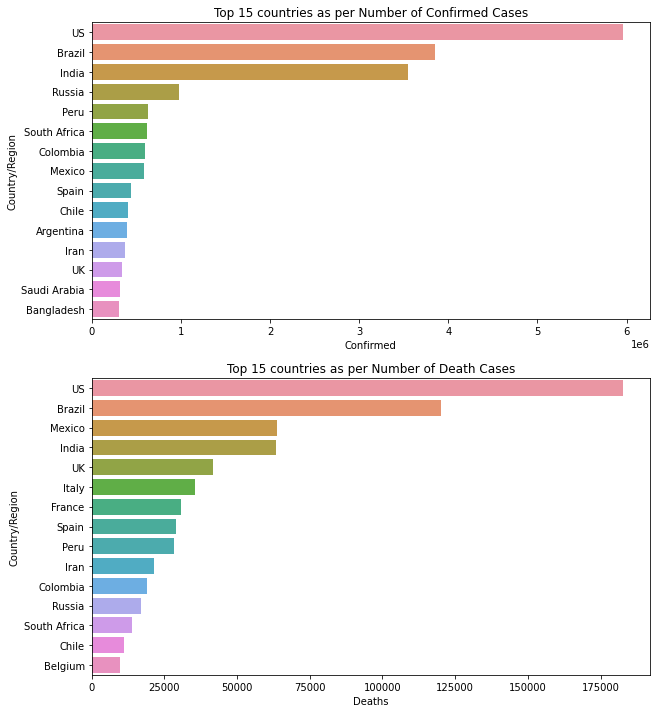

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

#### Top 25 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases

Text(0.5, 0, 'Recovery (in Percentage)')

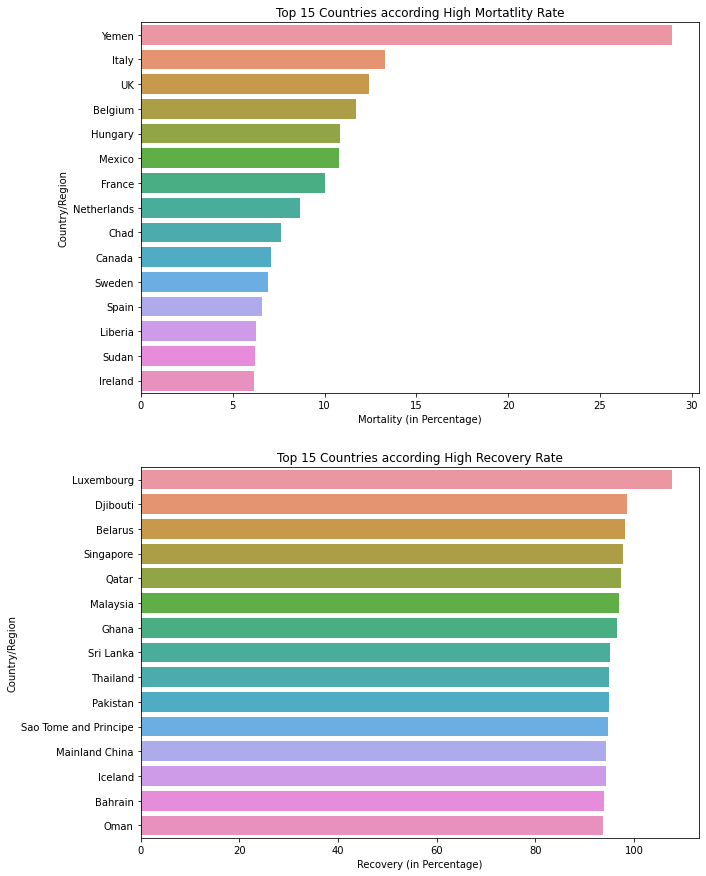

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

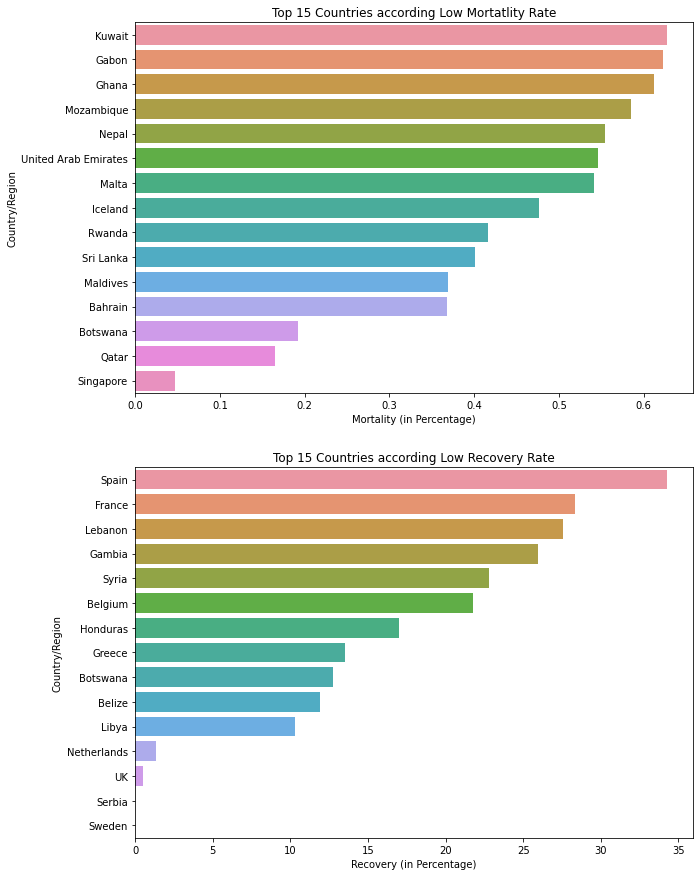

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

**What can we take away from this?**

---
Now, there could be a lot of sentiments about the huge cases in some of this countries including poor health structure, population indifference, indiscipline,...

However one must also consider that these countries may be at the forefront of infections. By this I mean that they may be hot immigration spots. Taking a look at tourism reports, it can be observed that these countries attract the largest number of international students as well as business entusiasts. This means that it is easier for people from other countries to bring infections into these countries and further infect the population. 

In [ ]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
MS Zaandam,9.000000,2.000000,22.222222
Sweden,83958.000000,5821.000000,6.933229
Serbia,31282.000000,710.000000,2.269676


It seems that recoveries in Sweden are quite low compared to the large confirmed cases. This is bad and is indicative in the corresponding large mortality rate when compared to other countries.

In [ ]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Mongolia,301.000000,295.000000,0.000000,98.006645
Cambodia,273.000000,265.000000,0.000000,97.069597
Seychelles,136.000000,127.000000,0.000000,93.382353
Eritrea,318.000000,284.000000,0.000000,89.308176
Bhutan,195.000000,135.000000,0.000000,69.230769


Wow, it looks like Vietnam is suceeding in the Covid-19 fight.  It is recording almost no deaths and very good recovery rate. Vietnam may actually be on its way to being free of Covid-19. 

It can be noted that all the above countries are small population countries anyway. So spread may be easier to manage as compared with larger contries.


Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

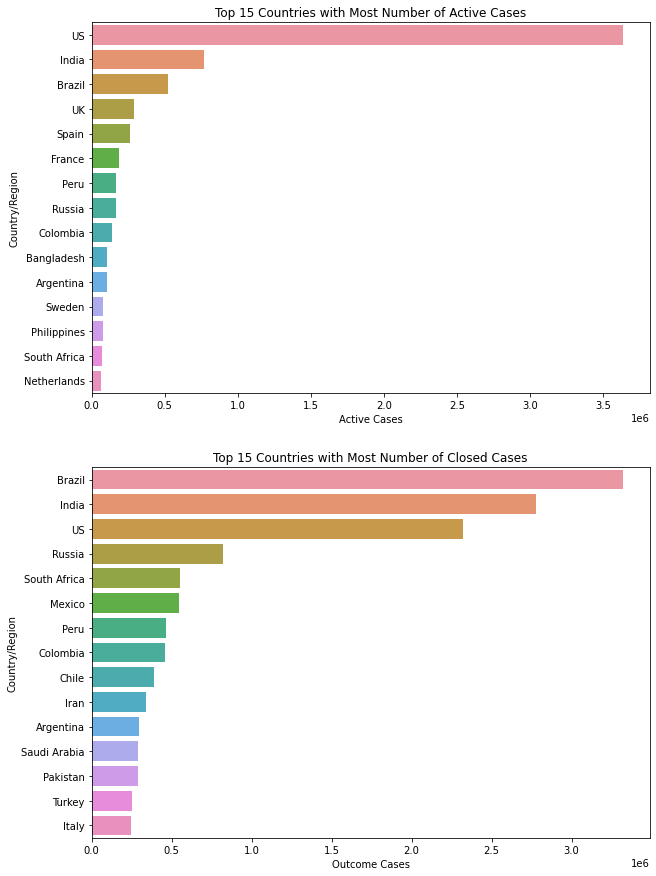

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [ ]:
country_date=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.loc[country].shape[0]
    confirm_rate.append((countrywise.loc[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

Text(0.5, 1.0, 'Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases')

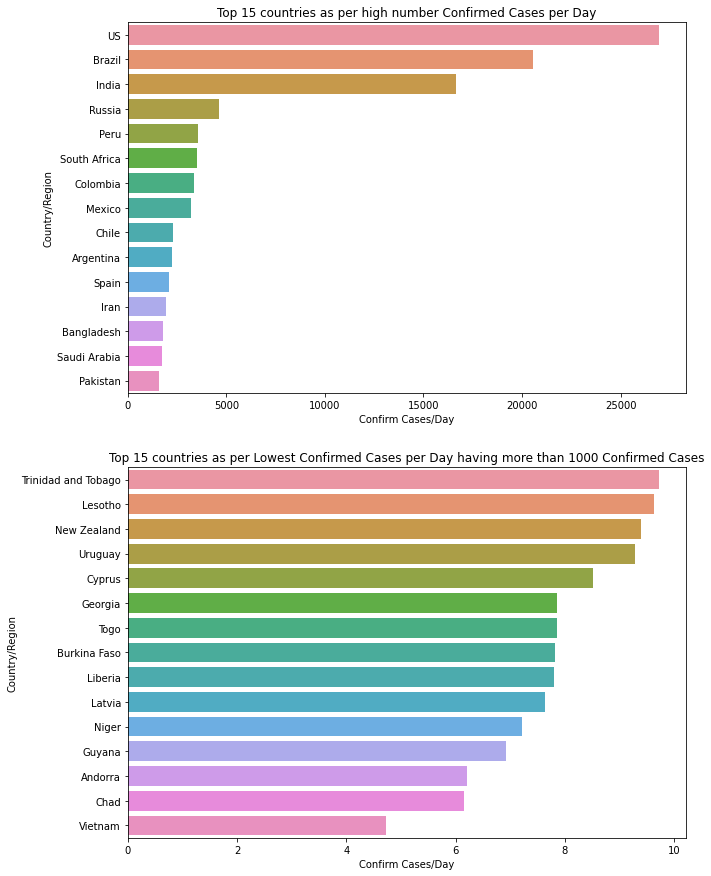

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")

Mainland China has recorded highest number of Closed cases as thier Recovery Rate is staggering recording 85%+. This could be attributed to the strict lockdown policy in the country. 

Unlike China, USA is widely acclaimed as a liberal country. Confirmed Cases/Day clearly indicates that US currently has highest number of Active Cases.



```
So is the human race going into extiction. I really hope not. But let us see... Survival probability is a great metric for checking this...
```



Mean Survival Probability across all countries 97.1141462840676
Median Survival Probability across all countries 97.91743252359151
Mean Death Probability across all countries 2.8858537159323987
Median Death Probability across all countries 2.082567476408485


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

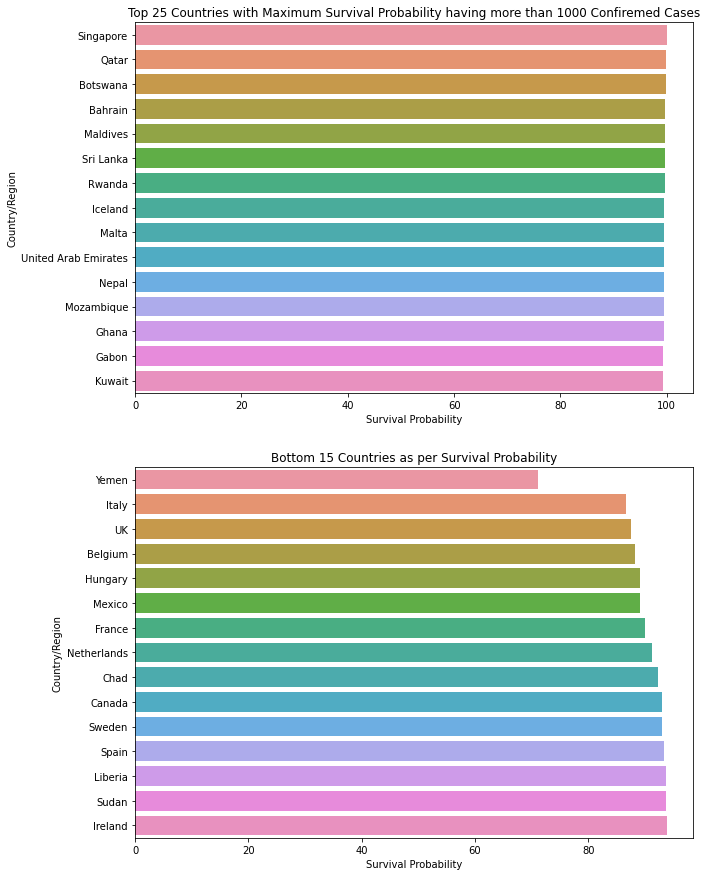

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

Now this is finally something that looks promising!!! We are not all dying afterall....

The plots show a healthy average survival probability of 95%+ across all countries. 

Also, The difference between median and average Death Probability clearly indicates that there are just very few countries with really high mortality rate. 

# Performance of countries in the handling of the disease

Understanding health data can be tricky - moreso covid-19 dataset that keeps changing with every passing second. In cases, a naive look at the rapid movement of these numbers can give an impression that things are just going wild. Now this is how exponentially growing data commonly looks like.

In this section, we will attempt to demystify these exponential numbers. We can show if a country is actually controlling the spiralling figures or the disease is just having a field day. 

According to Rathnayake et al. (2022), exponential growth of disease can never last forever. It is either the whole world will be wiped out or the disease would be wiped out but whatever is the case, the curve will definitely flatten.

So how are different countries controlling the spread of Covid-19 within their boundaries?? 

In [ ]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country]["log_confirmed"], y=grouped_country.loc[country]["log_active"],
                    mode='lines',name=country))
fig.update_layout(height=600,title="COVID-19 Journey of Top 15 Worst Affected Countries",
                 xaxis_title="Confirmed Cases (Logrithmic Scale)",yaxis_title="Active Cases (Logarithmic Scale)",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()


It is quite obvious that the disease is spreading in every part of the world. However, one thing that the graph shows us is that some countries' efforts in controlling the spread are working better that those of other countries. 


Few of the countries where  controlling practices seems to be working include  Germany, China,   Spain, Italy, Turkey. Here we can see some characteristic dips in infections. 

Unfurtunately, in countries like USA, United Kingdom and Russia, the exponential growth of the infections is uncontrollable. This calls for more urgent concerns and measures. 

It is worthy to note that countries like Iran are difficult to interprete since they show occational dips and some widecat surges. 

In [ ]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, y=grouped_country.loc[country]["Confirmed"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Confirmed Cases",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, 
                             y=grouped_country.loc[country]["Deaths"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Death Cases",
                 xaxis_title="Date",yaxis_title="Death Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
for country in countrywise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_country.loc[country].index, 
                             y=grouped_country.loc[country]["Recovered"].rolling(window=7).mean().diff(),
                    mode='lines',name=country))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Recovered Cases",
                 xaxis_title="Date",yaxis_title="Recovered Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Mortality and recovery country clusters

Clusters are a nice way to view how individual countries are managing a disease. As we know several factors affect the mortality and recovery rates in different countries. However, the effects are generally the same. You die or you get well!! 

In this section we want to see how countries are performing. Now that much of talking, lets create some clusters....

In [ ]:
X=countrywise[["Mortality","Recovery"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [ ]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

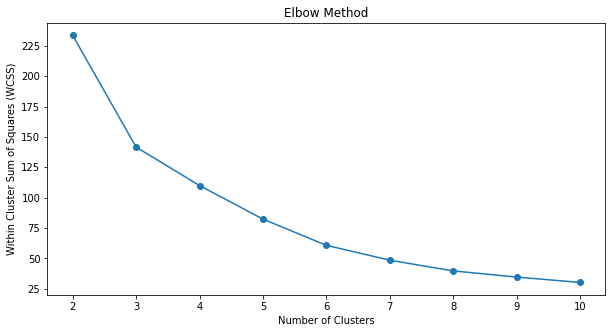

In [ ]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

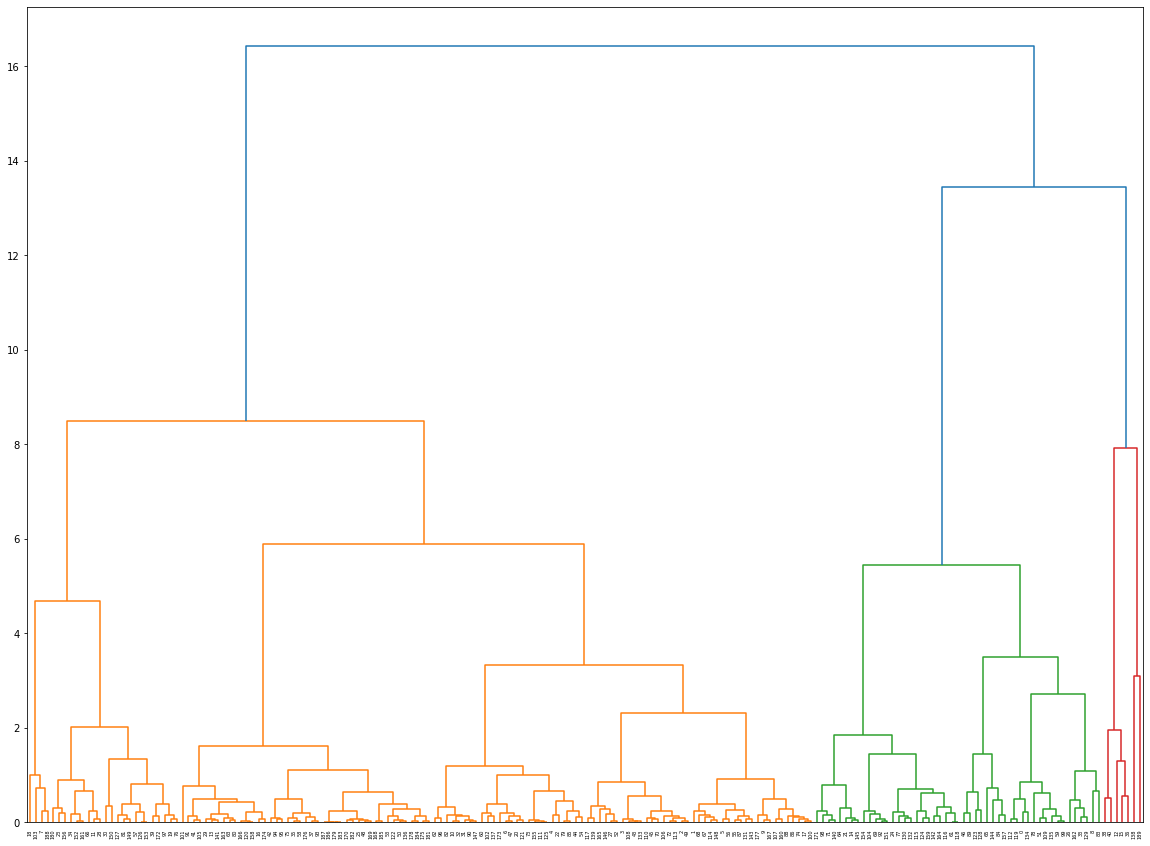

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

**The elbow and heireracal clustering technqus indicate that 3 clusters would be most efficient for our dataset.** 

**So which countries are in these clusters? and what do the clusters represent?** 

In [ ]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [ ]:
countrywise["Clusters"]=clf_final.predict(X)

In [ ]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Confirm Cases/Day,Survival Probability,Clusters
Country/Region,,,,,,,,,,
Mexico,591712.00,484283.00,63819.00,10.79,81.84,43610.00,548102.00,3198.44,89.21,1.00
UK,334916.00,1622.00,41585.00,12.42,0.48,291709.00,43207.00,1579.79,87.58,1.00
France,304947.00,86495.00,30601.00,10.03,28.36,187851.00,117096.00,1392.45,89.97,1.00
Italy,266853.00,208224.00,35473.00,13.29,78.03,23156.00,243697.00,1258.74,86.71,1.00
Belgium,84599.00,18403.00,9891.00,11.69,21.75,56305.00,28294.00,406.73,88.31,1.00
Netherlands,72128.00,986.00,6252.00,8.67,1.37,64890.00,7238.00,389.88,91.33,1.00
Hungary,5669.00,3759.00,614.00,10.83,66.31,1296.00,4373.00,31.67,89.17,1.00
Yemen,1946.00,1113.00,563.00,28.93,57.19,270.00,1676.00,13.70,71.07,1.00
Western Sahara,10.00,8.00,1.00,10.00,80.00,1.00,9.00,0.07,90.00,1.00


In [ ]:
print("Cluster 0 - Average Mortality Rate: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Cluster O - Average Recovery Rate: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Cluster 1 - Average Mortality Rate: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Cluster 1 - Average Recovery Rate: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Cluster 2 - Average Mortality Rate: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Cluster 2 - Average Recovery Rate: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())

Cluster 0 - Average Mortality Rate:  2.2463194361559777
Cluster O - Average Recovery Rate:  83.75183966895968
Cluster 1 - Average Mortality Rate:  13.887372332715879
Cluster 1 - Average Recovery Rate:  41.534456148992625
Cluster 2 - Average Mortality Rate:  2.3649469755029395
Cluster 2 - Average Recovery Rate:  39.4954479457303


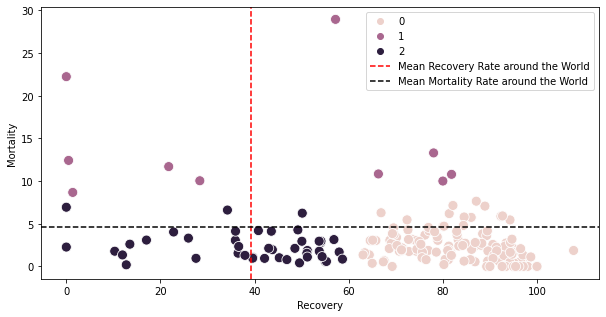

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Recovery"],y=countrywise["Mortality"],hue=countrywise["Clusters"],s=100)
plt.axvline(((datewise["Recovered"]/datewise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((datewise["Deaths"]/datewise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend()

**What do we take out from here?**

---

**Cluster 0** -->> set of countries which have **Low Mortality Rate** and really **High Recovery Rate**. 

These are the set of countries who has been able to control the COVID-19 by following pandemic controlling practices rigorously.

**Cluster 1** -->> set of countries which have **Low Mortality Rate** and really **Low Recovery Rate**. 

Not bad. Well, not good either. These are countries that have been able to manage ultimate effects of the infections. However, they are not doing so well with managing the spread. A lot of work still needs to be done in that regards. In clear terms, they need to do better with recoveries.  

**Cluster 2** -->> set of countries which have really **High Mortality Rate** and  **Good Recovery Rate**. 

These countries have recieved a great chunk of the bad side of the pandemic. However, they are now recovering exceptionally. A breath of relief...


## Prediction/Forecasting of global Covid-19 infections and deaths

Technology is the world's new engine. With machine learning techniques, the world can now see into the future from the present using the past. 

In this section, we will use the historical data obtained to predict the future pandemic situation. This will give us insight into how the global community can prepare to adress any eventuality and how resources can be allocated based on estimated realities. 

For our prediction, several models will be experimented they include:
* Linear Regression
* Support Vector Machine (SVM)
* Holt Model
* Arima Model

**Linear Regression Model for Confirm Cases Prediction**

In [ ]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [ ]:
lin_reg=LinearRegression()

In [ ]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression()

In [ ]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  6783550.068817438


In [ ]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>



**Support Vector Machine Model for Confirmed cases prediction** 


---





In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [ ]:
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [ ]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [ ]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  7337154.623732394


In [ ]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),
                               columns=["Dates","SVM Prediction"])
model_predictions.head()

,Dates,SVM Prediction
0,2020-08-30,36063496.693424
1,2020-08-31,36986186.793255
2,2020-09-01,37929893.884441
3,2020-09-02,38894999.213999
4,2020-09-03,39881889.192437


**Holt's Winter Model for confirmed cases prediction**

---



In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

In [ ]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  61669.032652232105


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
holt_winter_new_prediction=[]
for i in range (1,18):
  holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

**AUTO ARIMA (SARIMA Model) for Confirmed cases prediction**

In [ ]:
#!pip install pmdarima
from pmdarima import auto_arima

In [ ]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=4639.367, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=4675.407, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=4581.744, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=4625.152, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=4657.918, Time=0.03 sec
 ARIMA(1,2,0)(2,0,0)[7]             : AIC=4573.889, Time=0.21 sec
 ARIMA(1,2,0)(2,0,1)[7]             : AIC=4569.802, Time=0.47 sec
 ARIMA(1,2,0)(1,0,1)[7]             : AIC=4567.830, Time=0.26 sec
 ARIMA(1,2,0)(0,0,1)[7]             : AIC=4623.778, Time=0.11 sec
 ARIMA(1,2,0)(1,0,2)[7]             : AIC=4569.794, Time=0.41 sec
 ARIMA(1,2,0)(0,0,2)[7]             : AIC=4600.831, Time=0.21 sec
 ARIMA(1,2,0)(2,0,2)[7]             : AIC=inf, Time=2.83 sec
 ARIMA(2,2,0)(1,0,1)[7]             : AIC=4566.356, Time=0.32 sec
 ARIMA(2,2,0)(0,0,1)[7]             : AIC=4623.780, Time=0.14 sec
 ARIMA(2,2,0)(1,0,0)[7]             : 

ARIMA(order=(1, 2, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [ ]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  19757.51713353781


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,SVM Prediction,Holt's Winter Model Prediction,SARIMA Model Prediction
0,2020-08-30,36063496.693424,25293609.371584,25166096.178149
1,2020-08-31,36986186.793255,25494434.578008,25377936.984182
2,2020-09-01,37929893.884441,25757882.636107,25618550.435902
3,2020-09-02,38894999.213999,26044078.332874,25892420.645268
4,2020-09-03,39881889.192437,26344717.712481,26159148.304038


**KEY TAKEAWAYS**

---


*   The linear regression model made the worst prediction (nowhere near what it should be). This is mostly because covid-19 infection is not linear but rather, expnential in nature. 

*   The Holt and SARIMA models provided the best predictions. This is mostly because thier theory allows for the particularities of the covid-19 dataset. SARIMA gave the best RMSE of about 16,000 which is quite commendable when compared to others.
*   From the predictions, it is forecasted that the confirmed cases between 30th of August 2020 and 3rd of September 2020 is expected to be between 25 million and 26milion.
* The models can be extended to country-wise predictions. However that is beyond the scope of this project.


*   List item




#Prediction/Forecasting of global Death Cases




In the last subsection, the confirmed cases were predicted using several models. In this subsection, we will be predicting the number of people that are expected to die from the infection.

Since the ARIMA model gave us the best prediction in the previous predictions, we will be sticking to it.....

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Death Cases"))
fig.update_layout(title="Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
model_arima_deaths=auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,
                              max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)     
model_arima_deaths.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3541.341, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3539.893, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3524.581, Time=0.20 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3505.429, Time=0.44 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=3495.985, Time=0.39 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=3487.705, Time=0.79 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3540.145, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3533.508, Time=0.22 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3519.717, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3504.669, Time=0.63 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=3483.471, Time=0.89 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3542.137, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3516.596, Time=0.40 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3516.275, Time=0.72 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3452.786, Time=0.86 sec
 ARIMA(3,2

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
predictions_deaths=model_arima_deaths.predict(len(valid))
y_pred["ARIMA Death Prediction"]=predictions_deaths

In [ ]:
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(valid["Deaths"],predictions_deaths)))

Root Mean Square Error:  15035.346713553192


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Train Data for Death Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Deaths"],
                    mode='lines+markers',name="Validation Data for Death Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Death Prediction"],
                    mode='lines+markers',name="Prediction for Death Cases",))
fig.update_layout(title="Death Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
ARIMA_model_death_forecast=[]
for i in range(1,18):
    ARIMA_model_death_forecast.append(model_arima_deaths.predict(len(valid)+i)[-1])

In [ ]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Deaths","ARIMA Model Death Forecast"]).head()

,Deaths,ARIMA Model Death Forecast
0,2020-08-30,820622.571922
1,2020-08-31,821739.012063
2,2020-09-01,824686.293102
3,2020-09-02,829925.534739
4,2020-09-03,836250.330700


**What do we see?**

---
Based on our predictions, we are expecting about 820k to 840k deaths between August 30 and September 9th 2020.

We hope that the reality is lower!!!



# Conclusion


Based on our analysis, the following conclusion are made:

## **Please note that these conclusions are made as per the 2020 dataset when the pandemic was raving. The situation has long changed since then.** ##



*   Covid-19 is still very much with us. It is also still taking lives.
*   From the dataset, the mortality rate has been largely curbed by the global community. However, some few countries are still battling with deaths from infections. It must be added that the low mortality does not mean that more people are not been infected. In fact this is actually the case.The growth rate is far from flat but rather, exponential. 

* While some countries such as Sweden and Vietnam are containing the infections better, it is still raging uncontrollably in other countries such as USA, Spain, United Kingdom,and Italy. The key takeout from this is that these later countries can easily borrow from techniques adopted by the successful countries for thier healthcare system and administration.  

* In general, there is need to shore up enforcement of control mechanisms such nas  immigration testing, Contact Tracing and Quarantine to reduce country level spread of the disease.

### BE SAFE, STAY HEALTHY....

###WE HAVE CONQUERED TOUGHER CHALLENGES.....

##WE WILL CONQUER THIS TOGETHER!!!! 

#**References**

Rathnayake, Chirantha & Sachin, Mahen & Kavindu, Ushan & Hemachandra, Chethmini & Arachchige, Udara & Hettiarachchi, Parami. (2022). Impact of the Covid-19 pandemic in daily life. 27-36. 